Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import joblib, time
import sklearn.neural_network as nn
from sklearn.model_selection import train_test_split, validation_curve, RepeatedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

rng = np.random.RandomState(0)
path = u"midterm_hw_dataset/regression/train/3_train_regression.csv"
df = pd.read_csv(path)
m, n = df.shape
X = df.iloc[:, 0 : n - 1]
y = df.iloc[:, n - 1]
X_type = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rng)

warnings.filterwarnings('ignore', category=Warning, module='sklearn')

读取数据集，划分训练集和测试集

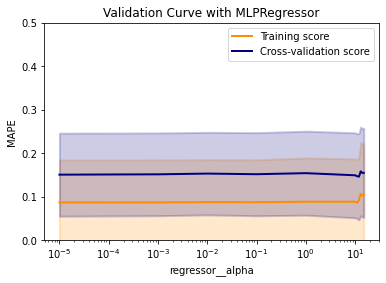

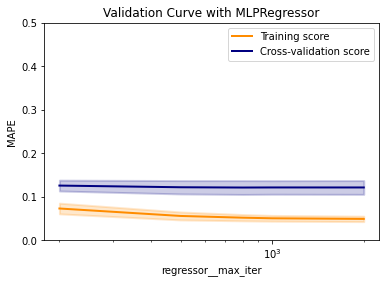

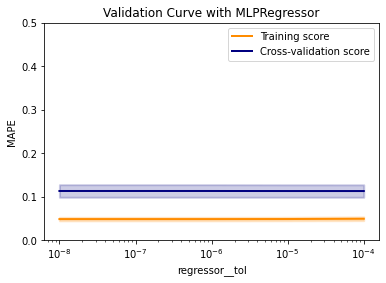

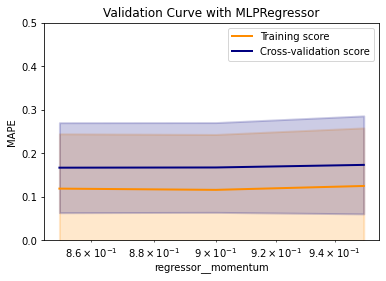

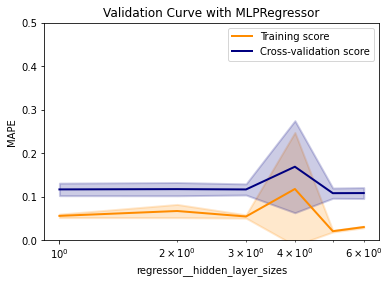

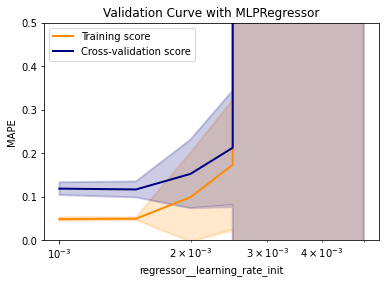

In [2]:
steps = [
	('poly', PolynomialFeatures(degree=2)),
	('scaler', StandardScaler()), 
	('regressor', nn.MLPRegressor(solver='sgd', alpha=11.5, hidden_layer_sizes=(13, 11, 5), random_state=rng, learning_rate_init=0.0015,\
                                  max_iter=2000, tol=1e-8, learning_rate='adaptive', verbose=0, early_stopping=False, momentum=0.95))
    # momentum=0.95 is better than momentum=0.9 when size is big enough
]
reg_pipe = Pipeline(steps=steps)

params = {
	'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 11, 12, 13, 14, 15],
	'regressor__max_iter': [200, 500, 800, 1000, 2000],
	'regressor__tol': np.logspace(-8, -4, 5),
	'regressor__momentum': [0.85, 0.9, 0.95],
	'regressor__hidden_layer_sizes': [(13, 3), (9, 5), (13, 11), (13, 11, 5), (130, 110, 50), (130, 110)],
	'regressor__learning_rate_init': [0.005, 0.004, 0.003, 0.0025, 0.002, 0.0015, 0.001],
}

for key in params.keys():
	train_scores, test_scores = validation_curve(
		reg_pipe, X, y, param_name=key, param_range=params[key], cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=rng),\
        scoring="neg_mean_absolute_percentage_error", n_jobs=8)
	train_scores_mean = np.mean(train_scores, axis=1) * (-1.0)
	train_scores_std = np.std(train_scores, axis=1)
	test_scores_mean = np.mean(test_scores, axis=1) * (-1.0)
	test_scores_std = np.std(test_scores, axis=1)
	
	plt.title("Validation Curve with MLPRegressor")
	plt.xlabel(key)
	plt.ylabel("MAPE")
	plt.ylim(0.0, 0.5)
	
	param_range = np.array(params[key])
	if key == 'regressor__hidden_layer_sizes':
		param_range = np.arange(1, len(params[key]) + 1) # Number represents the choice among the params list.
	lw = 2
    
	plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
	plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
		alpha=0.2, color="darkorange", lw=lw)
	plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
	plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
		alpha=0.2, color="navy", lw=lw)
	plt.legend(loc="best")
	plt.show()

运用MLP多层感知机作为回归器，画出MAPE值随着回归器各个参数变化的图像，方便做出选择

可以很明显地看出第五个隐含层尺寸：(130, 110, 50)是最好的，同时正则化惩罚参数alpha的选取也很大幅度地影响着最终的MAPE，最大迭代次数max_iter至少要大于1000才能完全收敛， 对(13, 11, 5)这个尺寸或者更大的隐含层尺寸，学习率不应该超过0.002，对loss下降的耐受度tol对MAPE影响较小，可维持此大小不变

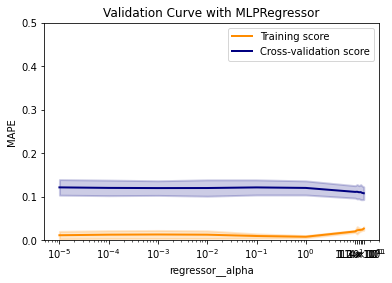

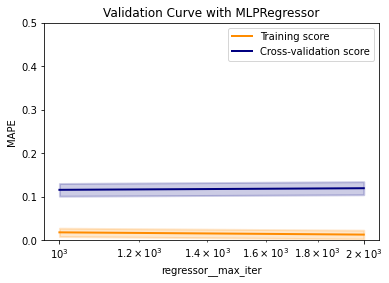

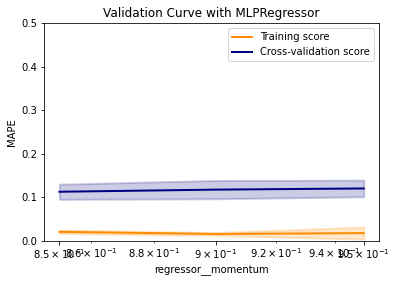

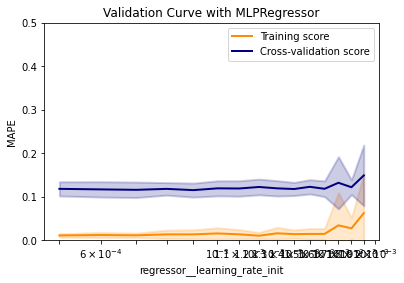

In [3]:
steps = [
	('poly', PolynomialFeatures(degree=2)),
	('scaler', StandardScaler()), 
	('regressor', nn.MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(130, 110, 50), random_state=rng, learning_rate_init=0.0015,\
                                  max_iter=2000, tol=1e-8, learning_rate='adaptive', verbose=0, early_stopping=False, momentum=0.95))
    # momentum=0.95 is better than momentum=0.9 when size is big enough
]
reg_pipe = Pipeline(steps=steps)

params = {
	'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10],
	'regressor__max_iter': [1000, 2000],
	'regressor__momentum': [0.85, 0.9, 0.95],
	'regressor__learning_rate_init': np.linspace(0.0005, 0.002, 16),
}

for key in params.keys():
	train_scores, test_scores = validation_curve(
		reg_pipe, X, y, param_name=key, param_range=params[key], cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=rng),\
        scoring="neg_mean_absolute_percentage_error", n_jobs=8)
	train_scores_mean = np.mean(train_scores, axis=1) * (-1.0)
	train_scores_std = np.std(train_scores, axis=1)
	test_scores_mean = np.mean(test_scores, axis=1) * (-1.0)
	test_scores_std = np.std(test_scores, axis=1)
	
	plt.title("Validation Curve with MLPRegressor")
	plt.xlabel(key)
	plt.ylabel("MAPE")
	plt.ylim(0.0, 0.5)
	
	param_range = np.array(params[key])
	lw = 2
    
	plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
	plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,\
		alpha=0.2, color="darkorange", lw=lw)
	plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
	plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,\
		alpha=0.2, color="navy", lw=lw)
	plt.xticks(param_range)
	plt.legend(loc="best")
	plt.show()

可见在隐层尺寸为(130, 110, 50)的条件下，max_iter=1000或2000均可，momentum亦可取0.9或0.95，但学习率不宜大于0.0016，alpha不宜大于1，否则MAPE会快速上升

我们取最大迭代次数max_iter=1000, 学习率为0.0012, 动量momentum=0.95, alpha=1e-5

0.015692116813935095 0.1264735345844631


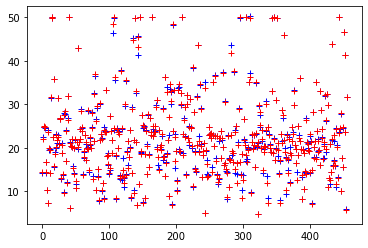

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error

# smaller alpha and (13, 3) is better at big data while (13, 11) is better at small data ?
# '3 hidden layers' is good at both! 
steps = [
	('poly', PolynomialFeatures(degree=2)),
	('scaler', StandardScaler()), 
	('regressor', nn.MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(130, 110, 50), random_state=rng, learning_rate_init=0.0012, max_iter=1000, tol=1e-8, learning_rate='adaptive', verbose=0, early_stopping=False, momentum=0.95))
    # momentum=0.95 is better than momentum=0.9 when size is big enough
]
reg_pipe = Pipeline(steps=steps)
reg_pipe.fit(X, y)
y_pred = reg_pipe.predict(X)
mape = mean_absolute_percentage_error(y, y_pred)
print(mape, reg_pipe['regressor'].loss_)
plt.plot(np.arange(len(y)), y_pred, 'b+', np.arange(len(y)), y, 'r+')
plt.show()

画出实际值与预测值的散点图，蓝点为预测值，红点为实际值

MAPE = 1.57%，效果看起来很不错

    fit_time  score_time  test_neg_mean_absolute_percentage_error  \
0   6.878655    0.004999                                -0.102788   
1   7.227653    0.005999                                -0.111556   
2   7.178651    0.004999                                -0.093905   
3   7.089647    0.006012                                -0.103223   
4   7.088652    0.005996                                -0.120421   
5   7.146279    0.004998                                -0.116597   
6   8.613266    0.004994                                -0.130207   
7   7.199718    0.008996                                -0.130885   
8   7.251930    0.006001                                -0.093229   
9   7.245250    0.009002                                -0.095413   
10  7.135914    0.007000                                -0.123345   
11  7.377254    0.005001                                -0.116935   
12  7.305497    0.007001                                -0.113295   
13  7.390622    0.005002          

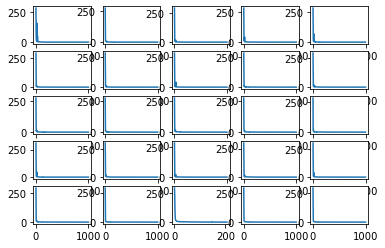

['BestEstimator_Group3_Sun Nov 21 18_53_52 2021_mape_0.013301183104943897.pkl']

In [5]:
scoring_dict={}
best_test_mape = -mape
best_estimator = reg_pipe

cv_results = cross_validate(reg_pipe, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=rng),\
                            scoring=['neg_mean_absolute_percentage_error', 'neg_mean_squared_error'],\
                            return_train_score=True, return_estimator=True, n_jobs=8)
cv_results = pd.DataFrame(cv_results)
estimators = cv_results['estimator']

train_MAPE_mean = cv_results['train_neg_mean_absolute_percentage_error'].mean() * (-1.0)
test_MAPE_mean = cv_results['test_neg_mean_absolute_percentage_error'].mean() * (-1.0)
train_MSE_mean = cv_results['train_neg_mean_squared_error'].mean() * (-1.0)
test_MSE_mean = cv_results['test_neg_mean_squared_error'].mean() * (-1.0)
scoring_dict = {'train_MAPE_mean': train_MAPE_mean,
					'test_MAPE_mean': test_MAPE_mean,
					'train_MSE_mean': train_MSE_mean,
					'test_MSE_mean': test_MSE_mean}
print(cv_results.drop(columns=['estimator']))

current_smallest_test_mape = np.max(cv_results['test_neg_mean_absolute_percentage_error'])
if current_smallest_test_mape > best_test_mape:
	current_smallest_test_mape_idx = np.argmax(cv_results['test_neg_mean_absolute_percentage_error'])
	current_smallest_estimator = estimators[current_smallest_test_mape_idx]
	best_estimator = current_smallest_estimator
	best_test_mape = current_smallest_test_mape

print("Train MAPE Mean: ", train_MAPE_mean)
print("Test MAPE Mean: ", test_MAPE_mean)
print("Train MSE Mean: ", train_MSE_mean)
print("Test MSE Mean: ", test_MSE_mean)

loss_list = []
j = 1
for est in estimators:
	loss_list.append(est['regressor'].loss_)
	plt.subplot(5, 5, j)
	plt.plot(est['regressor'].loss_curve_)
	j += 1
estimator_loss_mean = np.array(loss_list).mean()

print("\nEstimator Loss: ", estimator_loss_mean)
print("Best Test MAPE: ", best_test_mape * (-1.0))
plt.show()

date = time.asctime()
date = date.replace(":", "_")

best_estimator.fit(X, y)
y_pred_best = best_estimator.predict(X)
mape_best = mean_absolute_percentage_error(y, y_pred_best)

joblib.dump(best_estimator, f"BestEstimator_Group3_{date}_mape_{mape_best}.pkl")

画出五折验证的图和显示测试的MAPE值，最后导出回归器pkl文件

In [7]:
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_percentage_error

path = u"midterm_hw_dataset/regression/train/3_train_regression.csv"  #测试路径
df = pd.read_csv(path)
m, n = df.shape
X = df.iloc[:, 0 : n - 1]
Y = df.iloc[:, n - 1]

reg = joblib.load('BestEstimator_Group3_Sun Nov 21 18_53_52 2021_mape_0.013301183104943897.pkl')   #测试命令
print(mean_absolute_percentage_error(Y, reg.predict(X)))

0.013301183104943897


以上是测试程序

reg = joblib.load("BestEstimator_Group3_Sun Nov 21 13_33_54 2021_mape_0.01865975487975928.pkl") # 此为模型加载步骤

以下为测试函数：

In [8]:
def RegressorTestXY(modelpath, X_test, Y_test):
	"""
	Regressor Test Interface
	
	===================================
	Input:
	===================================
	modelpath: Model File's Path (.pkl)
	X_test: Test Data of X Columns, shape: (m, n) of np.ndarray / pd.DataFrame
	Y_test: Test Data of Y Columns, shape: (m,) of np.ndarray / pd.Series
	
	===================================
	Internal Dataset Variables (for debug use)
	===================================
	estimator: Pipeline or estimators implemented :meth: predict
	Y_pred: predictions from X_test with the estimator inputed, shape: (m,)
	
	===================================
	Return:
	===================================
	mape: Mean Absolute Percentage Error
	"""
	
	import joblib
	estimator = joblib.load(modelpath)
	Y_pred = estimator.predict(X_test)
	from sklearn.metrics import mean_absolute_percentage_error
	mape = mean_absolute_percentage_error(Y_test, Y_pred)
	
	return mape

以下为用例：

In [9]:
import pandas as pd

path = u"3_test_regression.csv"    #测试接口，此处放置测试文件路径
df = pd.read_csv(path)
m, n = df.shape
X = df.iloc[:, 0 : n - 1]
Y = df.iloc[:, n - 1]

acc = RegressorTestXY('BestEstimator_Group3_Sun Nov 21 18_53_52 2021_mape_0.013301183104943897.pkl', X, Y)
print(acc)

0.013301183104943897
